In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Data
data = pd.read_csv(r"C:\Users\cereb\Downloads\Telco_Customer_Churn.csv")

In [3]:
# Create a backup of the Dataframe
data_original = data.copy()

# Showcase the Total Number of Rows and COlumns in the Data
print("-"*60)
print(f"Total Rows in Dataset :{data.shape[0]}")
print(f"Total Columns in Dataset :{data.shape[1]}")
print("-"*60)


print("Basic column information:")
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

data.describe()

------------------------------------------------------------
Total Rows in Dataset :7043
Total Columns in Dataset :21
------------------------------------------------------------
Basic column information:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Converting Total Charges
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = "coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data.dropna(inplace=True)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
        'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges']
col=cols.copy()

columns_to_exclude = ['customerID','tenure','MonthlyCharges','TotalCharges']

# Remove specified columns from the list if they exist
for col in columns_to_exclude:
      cols.remove(col)

print("-" * 60)
for column in cols:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("-" * 30)
print("-" * 60)

------------------------------------------------------------
Unique values for column 'gender':
['Female' 'Male']
------------------------------
Unique values for column 'SeniorCitizen':
[0 1]
------------------------------
Unique values for column 'Partner':
['Yes' 'No']
------------------------------
Unique values for column 'Dependents':
['No' 'Yes']
------------------------------
Unique values for column 'PhoneService':
['No' 'Yes']
------------------------------
Unique values for column 'MultipleLines':
['No phone service' 'No' 'Yes']
------------------------------
Unique values for column 'InternetService':
['DSL' 'Fiber optic' 'No']
------------------------------
Unique values for column 'OnlineSecurity':
['No' 'Yes' 'No internet service']
------------------------------
Unique values for column 'OnlineBackup':
['Yes' 'No' 'No internet service']
------------------------------
Unique values for column 'DeviceProtection':
['No' 'Yes' 'No internet service']
-------------------------

In [9]:
df=data.copy
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data["Churn"].replace(to_replace="Yes", value =1, inplace=True)
data["Churn"].replace(to_replace="No", value =0, inplace=True)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
df2 = data.iloc[:,1:]
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


<Axes: >

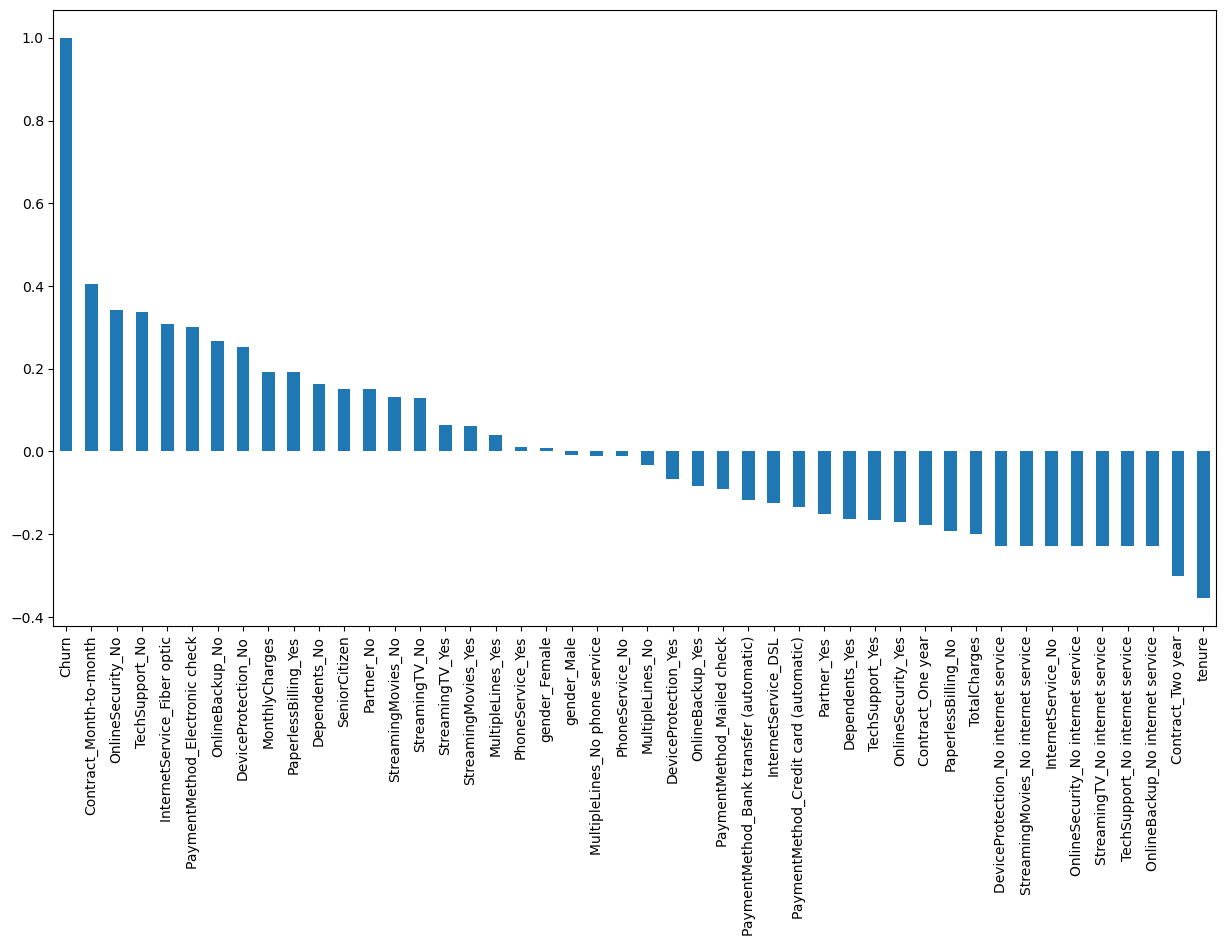

In [12]:
# Get Correlation
plt.figure(figsize=(15,8))
df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

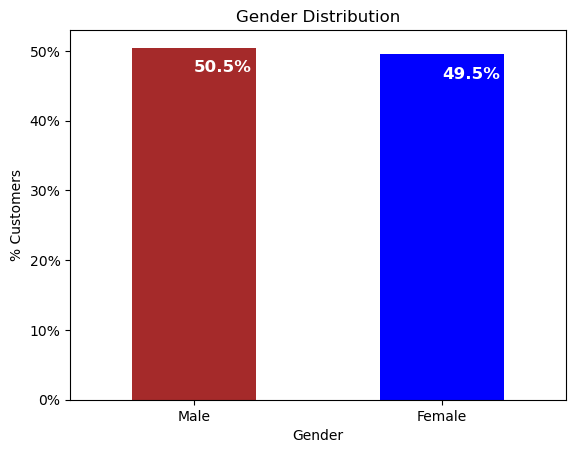

In [13]:
# Gender Distribution
colors = ['brown','blue']
gender_counts = data["gender"].value_counts()
ax = (gender_counts/len(data)*100).plot(kind="bar", stacked=True, rot=0, color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% Customers")
ax.set_xlabel("Gender")
ax.set_title("Gender Distribution")

total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count/total*100
    ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()-3.5, f"{percentage:.1f}%", fontsize=12, color='white', weight='bold')
plt.show()

Text(0.5, 1.0, '% Senior Citizen')

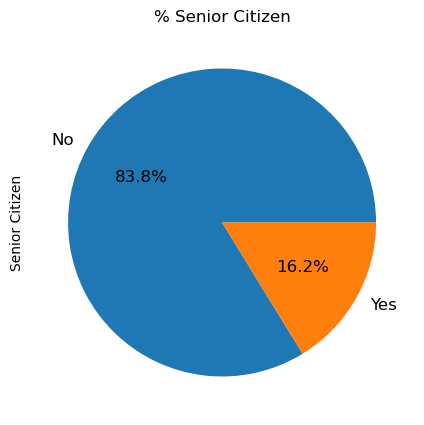

In [14]:
# Senior Citizen
ax=(data["SeniorCitizen"].value_counts()/len(data)).plot.pie(autopct="%.1f%%", labels=["No","Yes"], figsize=(5,5), fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Senior Citizen")
ax.set_title("% Senior Citizen")

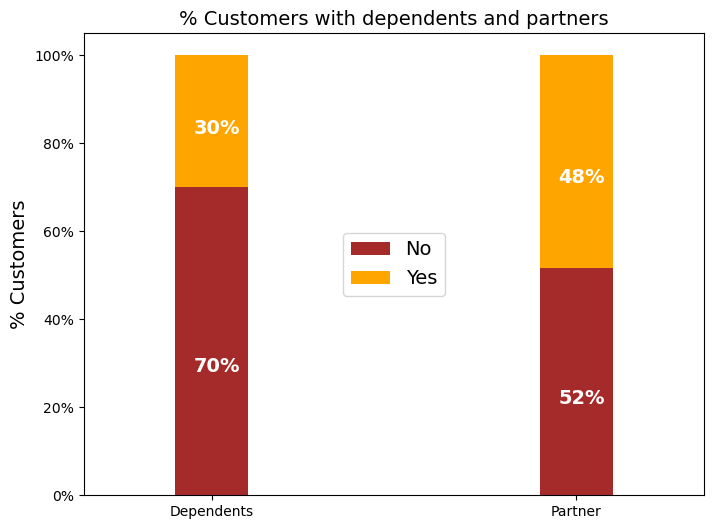

In [15]:
df2 = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data)
colors = ['brown','orange']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'No of Customers by their tenure')

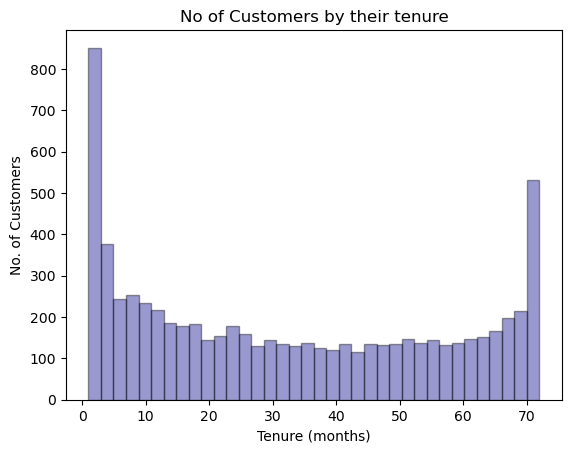

In [16]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')

Text(0.5, 1.0, 'No. of Customers by Contract Type')

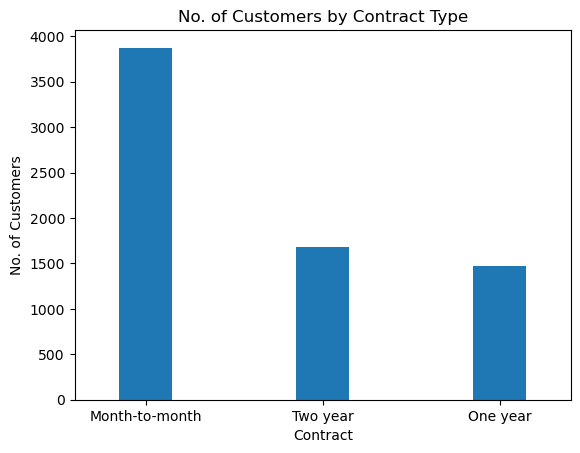

In [17]:
ax = data['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

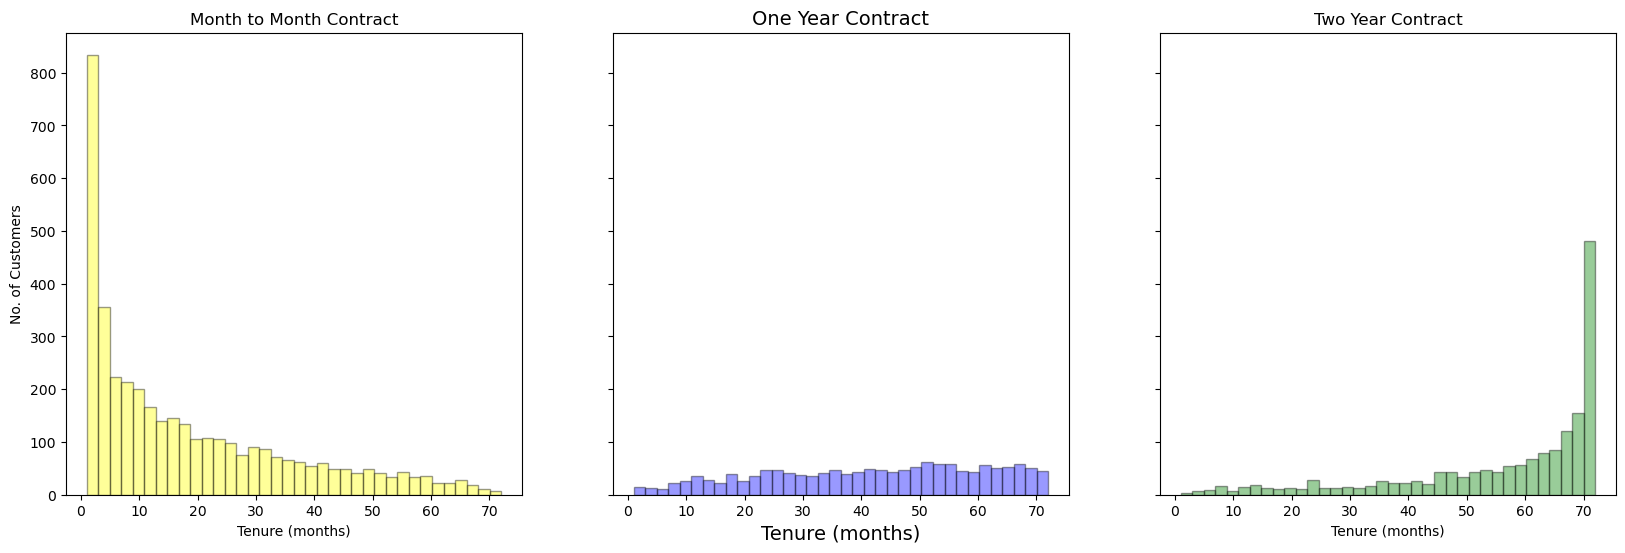

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'yellow',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

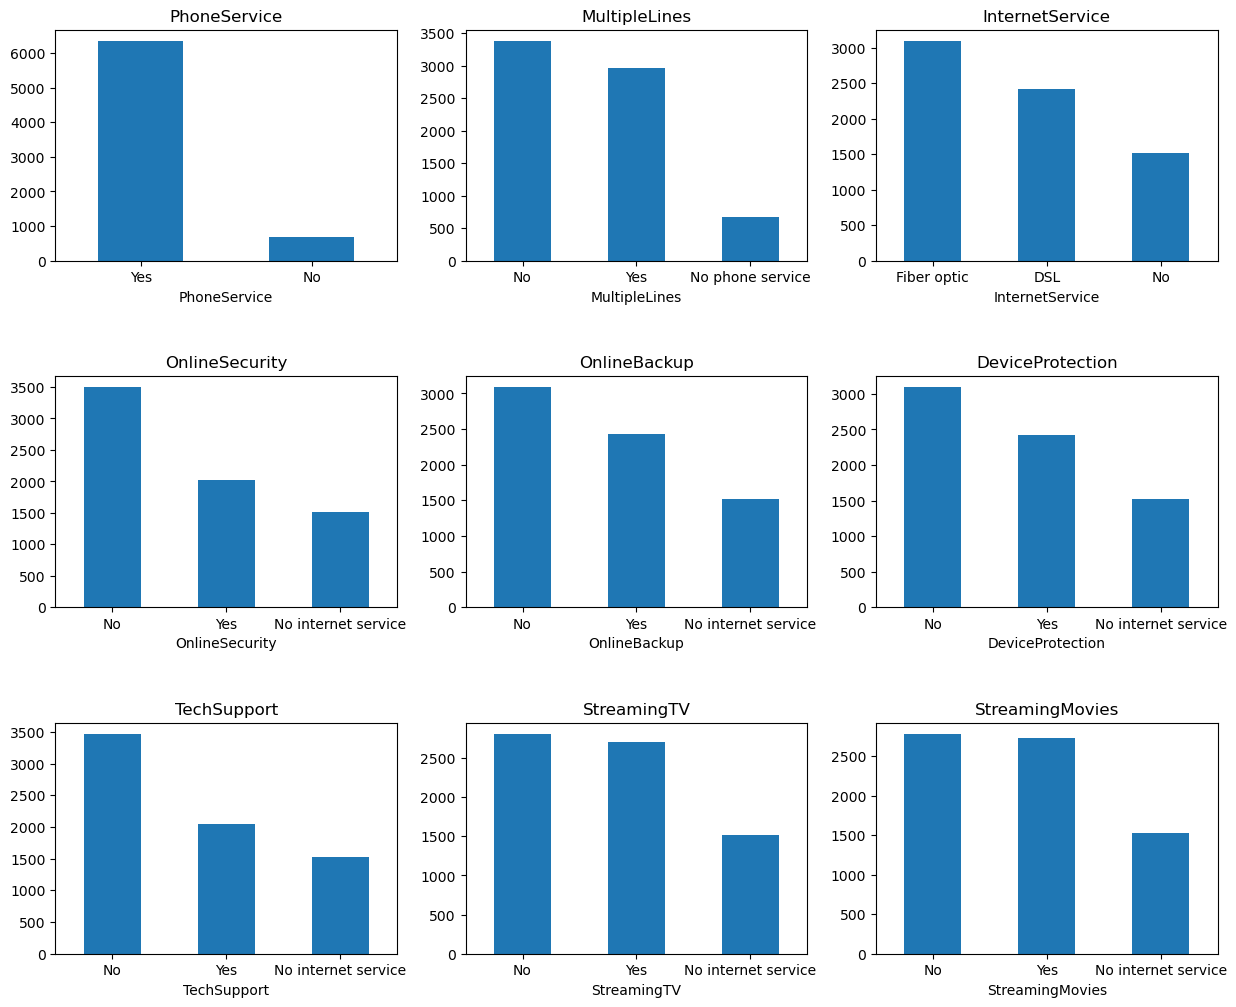

In [19]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5) 

for i, item in enumerate(services):
    row, col = divmod(i, 3)  

    ax = data[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  

plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

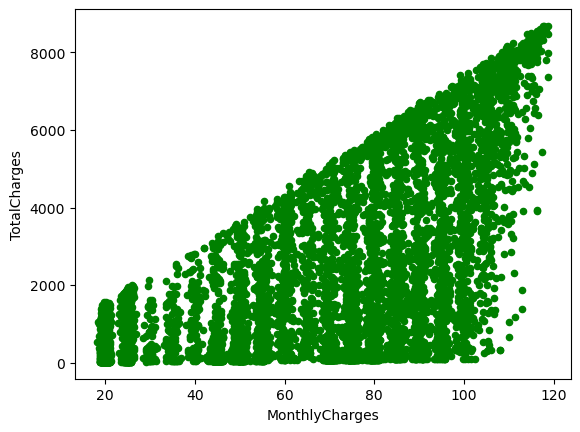

In [20]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

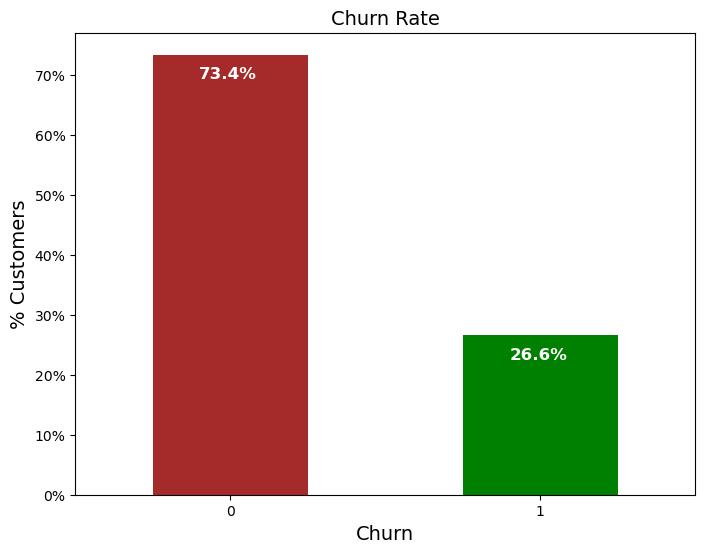

In [21]:
colors = ['brown', 'green']
ax = (data['Churn'].value_counts() * 100.0 / len(data)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(8, 6)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

<Axes: xlabel='Churn', ylabel='tenure'>

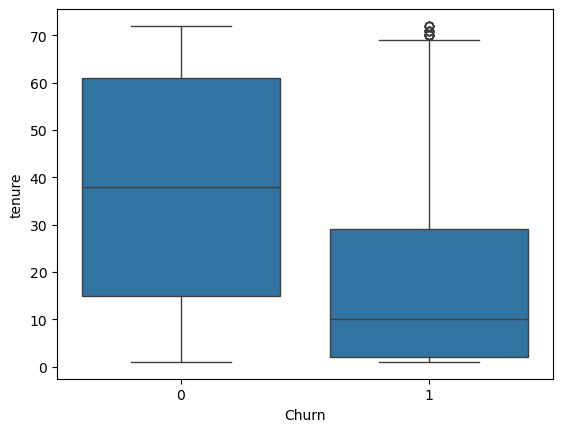

In [22]:
sns.boxplot(x = data.Churn, y = data.tenure)

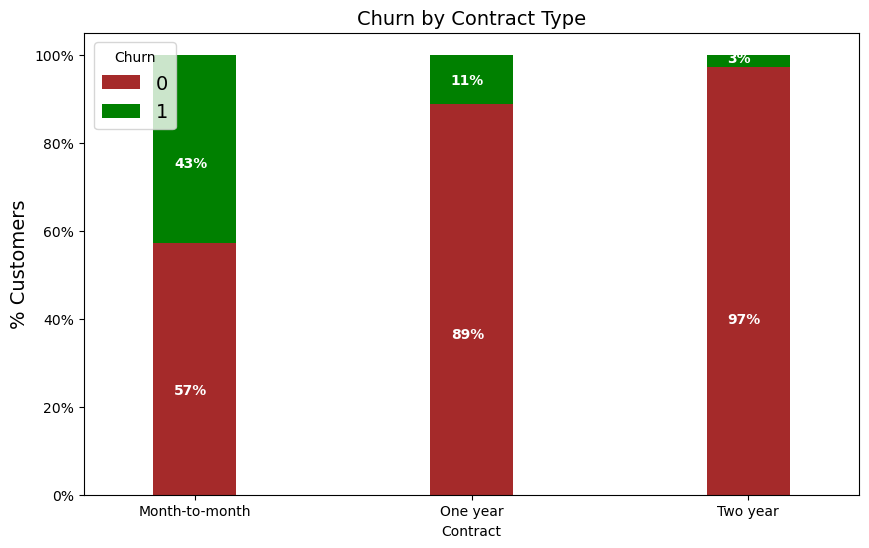

In [23]:
# colors = ['orange','brown']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)


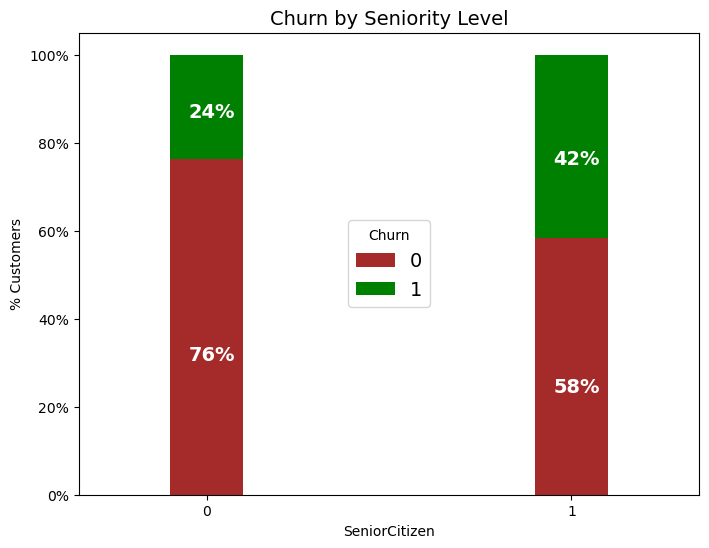

In [24]:
colors = ['brown','green']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

## Model

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
clean_data = data.copy()
df2.set_index("customerID", inplace=True)
df2 = data.iloc[:,1:]

In [27]:
# Training and Testing Dataset
train, valid, test = np.split(df_dummies.sample(frac=1),[int(0.6*len(df_dummies)), int(0.8*len(df_dummies))])

def scale_dataset(df, oversample = False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)

    data = np.hstack((x,np.reshape(y, (-1,1))))

    return data, x,y

train_data, x_train, y_train = scale_dataset(train, oversample = True)
valid_data, x_valid, y_valid = scale_dataset(valid, oversample = False)
test_data, x_test, y_test = scale_dataset(test, oversample = False)

# Initial Model Training

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boost': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'ADA Boost': AdaBoostClassifier(n_estimators=100, random_state=42),
}

result = []

for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Identify if the data is Overfitting, underfitting 'or' it is a balance fit

    y_train_pred = model.predict(x_train)
    train_accuracy_manual = accuracy_score(y_train, y_train_pred)

    y_pred_val = model.predict(x_valid)
    val_accuracy = accuracy_score(y_valid, y_pred_val)

    # Determine if overfitting, underfitting, or balanced
    if train_accuracy_manual > val_accuracy + 0.1:  # Threshold for overfitting
        fit_status = 'Overfitting'
        # Define parameter grid for GridSearchCV for overfitting models
        if name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif name == 'SVM':
            param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
        elif name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif name == 'Random Forest':
            param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
        elif name == 'Gradient Boost':
            param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
        elif name == 'ADA Boost':
            param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
        else:
            param_grid = {}  # No specific grid for other models

        if param_grid:
            grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5))
            grid_search.fit(x_train, y_train)
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
        else:
            best_params = "N/A"
            best_score = "N/A"


    elif val_accuracy > train_accuracy_manual + 0.1:  # Threshold for underfitting (less common)
        fit_status = 'Underfitting'
        best_params = "N/A"
        best_score = "N/A"
    else:
        fit_status = 'Balanced'
        best_params = "N/A"
        best_score = "N/A"

    # Store results
    result.append({
        'Model': name,
        'Accuracy': accuracy,
        'Training Accuracy': train_accuracy_manual,
        'Validation Accuracy': val_accuracy,
        'Fit Status': fit_status,
        'Best Parameters (GridSearchCV)': best_params,
        'Best Cross-Validation Score': best_score
    })

# Create DataFrame and display results
result_df = pd.DataFrame(result)
result_df

,Model,Accuracy,Training Accuracy,Validation Accuracy,Fit Status,Best Parameters (GridSearchCV),Best Cross-Validation Score
0,KNN,0.778962,0.916795,0.819346,Balanced,N/A,N/A
1,Logistic Regression,1.000000,1.000000,1.000000,Balanced,N/A,N/A
2,Naive Bayes,0.778962,1.000000,0.773115,Overfitting,N/A,N/A
3,SVM,1.000000,1.000000,1.000000,Balanced,N/A,N/A
4,Decision Tree,1.000000,1.000000,1.000000,Balanced,N/A,N/A
5,Random Forest,0.987918,1.000000,0.990043,Balanced,N/A,N/A
6,Gradient Boost,1.000000,1.000000,1.000000,Balanced,N/A,N/A
7,ADA Boost,1.000000,1.000000,1.000000,Balanced,N/A,N/A


In [28]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors = 5),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 100, random_state=42),
    'Gradient Boost': GradientBoostingClassifier(n_estimators = 100, random_state=42),
    'ADA Boost': AdaBoostClassifier(n_estimators = 100, random_state=42)
}

results = []
k_folds = 3
for name, model in models.items():
    # Train model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # K-Fold Cross Validation on training data
    cv_scores = cross_val_score(model, x_train, y_train, cv=k_folds)
    test_accuracy = accuracy_score(y_test, y_pred)

     # Determine if overfitting, underfitting, or balanced
    if train_accuracy_manual > val_accuracy + 0.1:
        fit_status = 'Overfitting'
        # K-Fold Cross Validation on training data
        cv_scores = cross_val_score(model, x_train, y_train, cv=k_folds)
        test_accuracy = accuracy_score(y_test, y_pred)
    elif val_accuracy > train_accuracy_manual + 0.1:
        fit_status = 'Underfitting'
    else:
        fit_status = 'Balanced'
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy*100,
        'Loss': loss*100,
        'Precision': precision*100,
        'Recall': recall*100,
        'F1-score': f1*100,
        "Mean Accuracy": cv_scores.mean()*100,
        "Test Model Accuracy": test_accuracy*100,
        "Fit Status": fit_status
        
    })


# Create DataFrame and display results
results_df = pd.DataFrame(results)
report = results_df.set_index('Model')
report = report.sort_values(by='Mean Accuracy', ascending = False)

report['Accuracy'] = report['Accuracy'].map('{:.2f}'.format)
report['Loss'] = report['Loss'].map('{:.2f}'.format)
report['Precision'] = report['Precision'].map('{:.2f}'.format)
report['Recall'] = report['Recall'].map('{:.2f}'.format)
report['F1-score'] = report['F1-score'].map('{:.2f}'.format)
report['Mean Accuracy'] = report['Mean Accuracy'].map('{:.2f}'.format)
report['Test Model Accuracy'] = report['Test Model Accuracy'].map('{:.2f}'.format)

display(report)

,Accuracy,Loss,Precision,Recall,F1-score,Mean Accuracy,Test Model Accuracy,Fit Status
Model,,,,,,,,
Logistic Regression,100.00,0.24,100.00,100.00,100.00,100.00,100.00,Balanced
Naive Bayes,77.90,796.70,60.68,77.90,68.22,100.00,77.90,Balanced
SVM,100.00,0.03,100.00,100.00,100.00,100.00,100.00,Balanced
Decision Tree,100.00,0.00,100.00,100.00,100.00,100.00,100.00,Balanced
Gradient Boost,100.00,0.00,100.00,100.00,100.00,100.00,100.00,Balanced
ADA Boost,100.00,51.27,100.00,100.00,100.00,100.00,100.00,Balanced
Random Forest,98.79,10.65,98.81,98.79,98.78,99.95,98.79,Balanced
KNN,77.90,217.75,84.70,77.90,79.53,85.39,77.90,Balanced
